<a href="https://colab.research.google.com/github/IT24102008/PG151MLProject/blob/IT24102008/IT24102008_Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, auc)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("IT24102008 - RANDOM FOREST MODEL FOR STROKE PREDICTION")
print("="*70)

IT24102008 - RANDOM FOREST MODEL FOR STROKE PREDICTION


# IT24102008 - Random Forest Model for predicting The possibility of having a Stroke.

#### Load the data



In [1]:
import pandas as pd

df = pd.read_csv("/content/preprocessed_stroke_data.csv")
display(df.head())

,0,1,2,3,4,5,6,7,8,9,stroke
0,2.305606,1.264816,0.250546,-0.430617,0.834524,0.333307,0.320894,-0.643058,-0.062396,-0.212238,1
1,1.453986,1.647613,-0.484745,0.160239,-1.163737,-0.412336,-0.231320,0.114952,0.208955,-0.247852,1
2,1.571330,-0.416363,-0.638432,0.597845,0.169697,-0.612380,0.748779,0.043821,-0.296528,-0.280570,1
3,1.537974,1.474840,0.641771,0.057266,0.514872,0.671681,-0.587822,0.692612,0.170372,-0.125929,1
4,1.642192,1.709071,-1.520156,0.258872,-1.103096,-0.424797,-0.188216,0.153761,-0.201548,0.639121,1


#### Prepare the data

In [2]:
X = df.drop('stroke', axis=1)
y = df['stroke']
display(X.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9
0,2.305606,1.264816,0.250546,-0.430617,0.834524,0.333307,0.320894,-0.643058,-0.062396,-0.212238
1,1.453986,1.647613,-0.484745,0.160239,-1.163737,-0.412336,-0.231320,0.114952,0.208955,-0.247852
2,1.571330,-0.416363,-0.638432,0.597845,0.169697,-0.612380,0.748779,0.043821,-0.296528,-0.280570
3,1.537974,1.474840,0.641771,0.057266,0.514872,0.671681,-0.587822,0.692612,0.170372,-0.125929
4,1.642192,1.709071,-1.520156,0.258872,-1.103096,-0.424797,-0.188216,0.153761,-0.201548,0.639121


,stroke
0,1
1,1
2,1
3,1
4,1


#### Split the data

Split the data into training and testing sets to evaluate the model's performance on unseen data.


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4088, 10)
X_test shape: (1022, 10)
y_train shape: (4088,)
y_test shape: (1022,)


## Train the model - Random Forest


In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make predictions

Use the trained model to make predictions on the test data.


In [5]:
y_pred = model.predict(X_test)

## Evaluate the model

Evaluate the performance of the model using appropriate metrics :- accuracy, precision, recall, and F1-score.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9384
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


## Summary:

* The precision, recall, and F1-score were all 0.0000, indicating that the model did not correctly identify any of the positive cases (stroke) in the test set.


### Demonstrate Overfitting

To show how overfitting can occur, let's evaluate the model's performance on the training data and compare it to the performance on the test data.

We have to revise and update the model to get correct values for. Lets add some Hyperparameters.


Dataset Information:
  Total samples: 5110
  Total features: 10

Class Distribution:
stroke
0    4861
1     249
Name: count, dtype: int64

Class Balance Ratio:
  No Stroke (0): 4861 (95.13%)
  Stroke (1): 249 (4.87%)
  Imbalance Ratio: 19.52:1

✓ Class distribution plot saved as 'class_distribution.png'


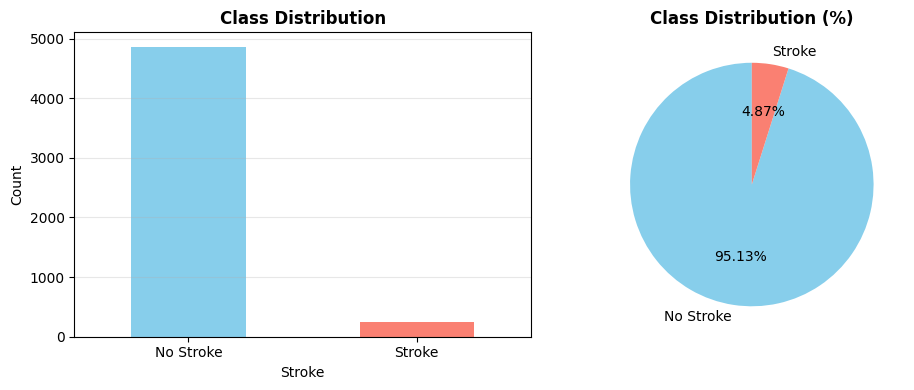

In [9]:
print(f"\nDataset Information:")
print(f"  Total samples: {len(df)}")
print(f"  Total features: {df.shape[1] - 1}")

print(f"\nClass Distribution:")
class_dist = df['stroke'].value_counts()
print(class_dist)
print(f"\nClass Balance Ratio:")
print(f"  No Stroke (0): {class_dist[0]} ({class_dist[0]/len(df)*100:.2f}%)")
print(f"  Stroke (1): {class_dist[1]} ({class_dist[1]/len(df)*100:.2f}%)")
print(f"  Imbalance Ratio: {class_dist[0]/class_dist[1]:.2f}:1")

# Visualize class distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
class_dist.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution', fontweight='bold')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Stroke', 'Stroke'], rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(class_dist, labels=['No Stroke', 'Stroke'], autopct='%1.2f%%',
        colors=['skyblue', 'salmon'], startangle=90)
plt.title('Class Distribution (%)', fontweight='bold')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
print("\n✓ Class distribution plot saved as 'class_distribution.png'")
plt.show()

# **Random** **Forest Model 2 - Revised.**

In [10]:
X = df.drop('stroke', axis=1)
y = df['stroke']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Train-test split complete (80-20 split with stratification)")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest set class distribution:")
print(pd.Series(y_test).value_counts())


Features (X) shape: (5110, 10)
Target (y) shape: (5110,)

✓ Train-test split complete (80-20 split with stratification)
  Training samples: 4088
  Testing samples: 1022

Training set class distribution:
stroke
0    3889
1     199
Name: count, dtype: int64

Test set class distribution:
stroke
0    972
1     50
Name: count, dtype: int64


Check Over fitting

In [12]:
def check_overfitting_underfitting(model, X_train, y_train, X_test, y_test, model_name):
    """
    Comprehensive function to check for overfitting and underfitting
    """
    print("\n" + "-"*70)
    print(f"OVERFITTING/UNDERFITTING ANALYSIS - {model_name}")
    print("-"*70)

In [14]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"✓ SMOTE applied successfully")
print(f"  Original training samples: {X_train.shape[0]}")
print(f"  After SMOTE: {X_train_smote.shape[0]}")
print(f"\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

model_v2 = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

print("\n✓ Training Variant 2...")
model_v2.fit(X_train_smote, y_train_smote)
print("✓ Training complete!")

# Check overfitting/underfitting
results_v2 = check_overfitting_underfitting(
    model_v2, X_train_smote, y_train_smote, X_test, y_test, "Variant 2 (SMOTE)")

✓ SMOTE applied successfully
  Original training samples: 4088
  After SMOTE: 7778

Class distribution after SMOTE:
stroke
0    3889
1    3889
Name: count, dtype: int64

✓ Training Variant 2...
✓ Training complete!

----------------------------------------------------------------------
OVERFITTING/UNDERFITTING ANALYSIS - Variant 2 (SMOTE)
----------------------------------------------------------------------


### Evaluate Model 2

Evaluate the performance of `model_v2` using appropriate metrics.

In [16]:
y_pred_v2 = model_v2.predict(X_test)

accuracy_v2 = accuracy_score(y_test, y_pred_v2)
precision_v2 = precision_score(y_test, y_pred_v2)
recall_v2 = recall_score(y_test, y_pred_v2)
f1_v2 = f1_score(y_test, y_pred_v2)

print("Model 2 (SMOTE) Test Set Metrics:")
print(f"Accuracy: {accuracy_v2:.4f}")
print(f"Precision: {precision_v2:.4f}")
print(f"Recall: {recall_v2:.4f}")
print(f"F1-score: {f1_v2:.4f}")

Model 2 (SMOTE) Test Set Metrics:
Accuracy: 0.9002
Precision: 0.1061
Recall: 0.1400
F1-score: 0.1207


1. Precision: 0.1061 (10.6%)

* Only 10.6% of predicted strokes are actually strokes

* 89.4% are false alarms
* This means if the model predicts stroke for 100 patients, only ~11 actually have strokes


2. Recall: 0.1400 (14%)

* Only catching 14% of actual stroke cases
* Missing 86% of stroke patients - This is dangerous!


3. High Accuracy (90%) is misleading

* Just predicting "No Stroke" for everyone gives 95% accuracy
* Accuracy isn't meaningful with imbalanced data

#**Random Forest Model 3 - Revised**

In [17]:
print("="*70)
print("IMPROVED MODEL - With Class Weights")
print("="*70)

# This time we Train with class weights
model_v3 = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Automatically adjust weights
    random_state=42,
    n_jobs=-1
)

print("\n✓ Training improved model with balanced class weights...")
model_v3.fit(X_train_smote, y_train_smote)
print("✓ Training complete!")

# Evaluate
y_pred_v3 = model_v3.predict(X_test)
accuracy_v3 = accuracy_score(y_test, y_pred_v3)
precision_v3 = precision_score(y_test, y_pred_v3)
recall_v3 = recall_score(y_test, y_pred_v3)
f1_v3 = f1_score(y_test, y_pred_v3)

print("\nModel 3 (Improved) Test Set Metrics:")
print(f"Accuracy:  {accuracy_v3:.4f}")
print(f"Precision: {precision_v3:.4f}")
print(f"Recall:    {recall_v3:.4f}")
print(f"F1-score:  {f1_v3:.4f}")

IMPROVED MODEL - With Class Weights

✓ Training improved model with balanced class weights...
✓ Training complete!

Model 3 (Improved) Test Set Metrics:
Accuracy:  0.8640
Precision: 0.1440
Recall:    0.3600
F1-score:  0.2057


# **Random Forest Model 4**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_res, y_train_res)

y_proba = rf.predict_proba(X_test)[:, 1]
threshold = 0.3  # Lowering threshold improves recall
y_pred = (y_proba >= threshold).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Improved Random Forest Results ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

=== Improved Random Forest Results ===
Accuracy : 0.7270
Precision: 0.1246
Recall   : 0.7600
F1-score : 0.2141

Detailed Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       972
           1       0.12      0.76      0.21        50

    accuracy                           0.73      1022
   macro avg       0.55      0.74      0.52      1022
weighted avg       0.94      0.73      0.80      1022



# **Random Forest Model 5 - Final Model**

# Task
Train a Random Forest model with hyperparameter tuning using cross-validation on the dataset located at "/content/preprocessed_stroke_data.csv" to predict the possibility of having a stroke, and save the final model as a pickle file.

## Define hyperparameter grid

### Subtask:
Define a range of hyperparameters for the Random Forest model to search over during tuning.


**Reasoning**:
Define the hyperparameter grid for the Random Forest model.



In [21]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}
print("Hyperparameter grid defined:")
print(param_grid)

Hyperparameter grid defined:
{'n_estimators': [100, 200, 300], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'class_weight': ['balanced', None]}


## Perform cross-validated grid search

### Subtask:
Use GridSearchCV with cross-validation to find the best combination of hyperparameters from the defined grid on the training data.


**Reasoning**:
Use GridSearchCV to find the best hyperparameters for the Random Forest model on the oversampled training data.



In [22]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

grid_search.fit(X_train_res, y_train_res)

print("Best hyperparameters found:")
print(grid_search.best_params_)

KeyboardInterrupt: 